In [1]:
import sys
import os
print(sys.executable)


/Users/admin/Desktop/Data Science/.venv/bin/python


/var/folders/tp/yqpy0mgx4h33s134ys5_bylc0000gn/T/ipykernel_7441/238275555.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


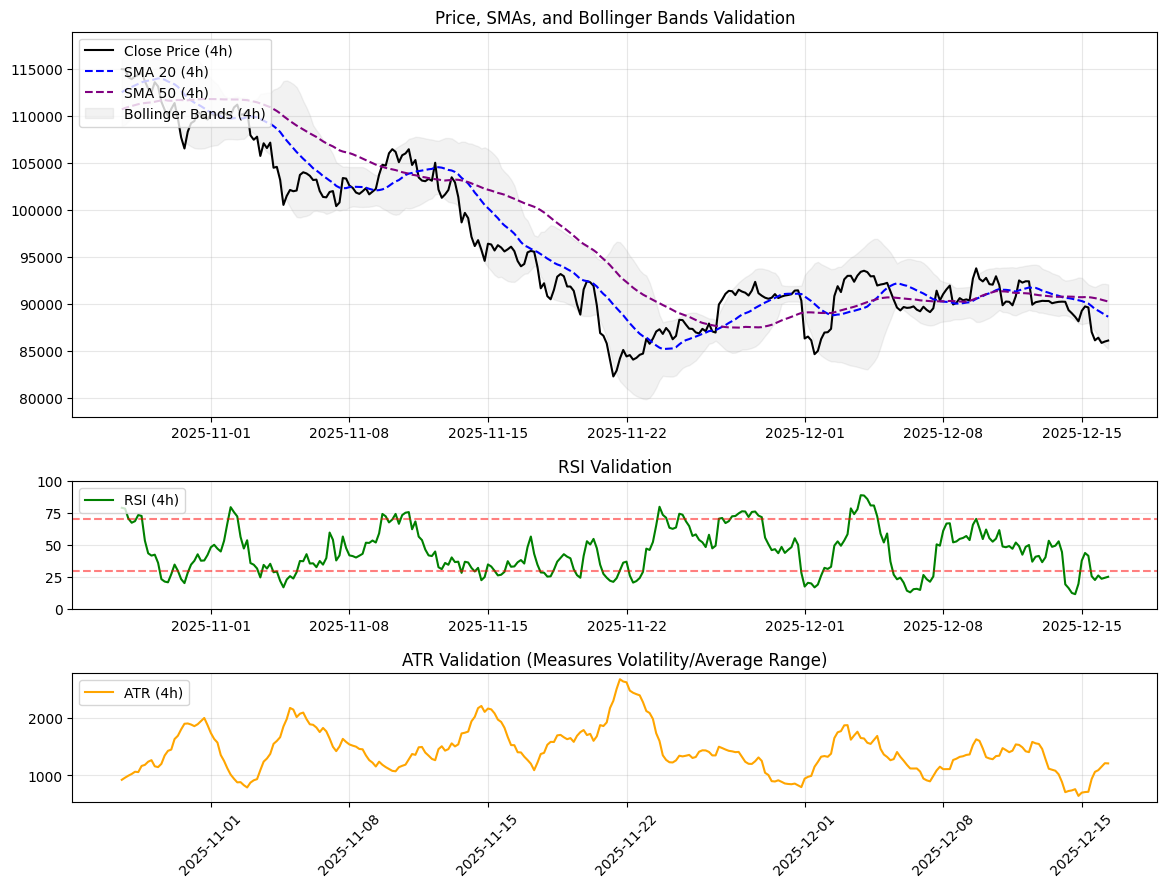


--- Daily Alignment Check (Last 12 4h rows) ---
                              close    sma_50_D  rsi_D
timestamp                                             
2025-12-14 12:00:00+00:00  89022.91  90894.6932    0.0
2025-12-14 16:00:00+00:00  88644.88  90912.8926    0.0
2025-12-14 20:00:00+00:00  88172.17  90931.0920    0.0
2025-12-15 00:00:00+00:00  89282.60  90907.9346    0.0
2025-12-15 04:00:00+00:00  89753.42  90884.7772    0.0
2025-12-15 08:00:00+00:00  89641.28  90863.4848    0.0
2025-12-15 12:00:00+00:00  87033.22  90842.1924    0.0
2025-12-15 16:00:00+00:00  86149.96  90820.9000    0.0
2025-12-15 20:00:00+00:00  86432.08  90799.6076    0.0
2025-12-16 00:00:00+00:00  85875.92  90743.5134    0.0
2025-12-16 04:00:00+00:00  86021.51  90687.4192    0.0
2025-12-16 08:00:00+00:00  86124.83  90608.1546    0.0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Load ONLY the finished features file
df = pd.read_csv("../data/btc_usdt_features.csv", index_col=0, parse_dates=True)

# Define how many recent candles to view
N_CANDLES = 300 
df_plot = df.iloc[-N_CANDLES:]

# --- Visual Validation using Subplots ---
# This creates a complex chart showing price, SMAs, and RSI

fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 1], hspace=0.3) 

# --- Plot 1: Price and SMAs/Bollinger Bands ---
ax_price = fig.add_subplot(gs[0])
ax_price.plot(df_plot.index, df_plot['close'], label='Close Price (4h)', color='black', linewidth=1.5)
ax_price.plot(df_plot.index, df_plot['sma_20_4h'], label='SMA 20 (4h)', color='blue', linestyle='--')
ax_price.plot(df_plot.index, df_plot['sma_50_4h'], label='SMA 50 (4h)', color='purple', linestyle='--')
ax_price.fill_between(df_plot.index, df_plot['bb_upper_4h'], df_plot['bb_lower_4h'], color='gray', alpha=0.1, label='Bollinger Bands (4h)')
ax_price.set_title("Price, SMAs, and Bollinger Bands Validation")
ax_price.legend(loc='upper left')
ax_price.grid(True, alpha=0.3)

# --- Plot 2: RSI Validation ---
ax_rsi = fig.add_subplot(gs[1], sharex=ax_price)
ax_rsi.plot(df_plot.index, df_plot['rsi_4h'], label='RSI (4h)', color='green')
ax_rsi.axhline(70, linestyle='--', alpha=0.5, color='red') # Overbought line
ax_rsi.axhline(30, linestyle='--', alpha=0.5, color='red') # Oversold line
ax_rsi.set_ylim(0, 100) # RSI must always be between 0 and 100
ax_rsi.set_title("RSI Validation")
ax_rsi.legend(loc='upper left')
ax_rsi.grid(True, alpha=0.3)


# --- Plot 3: ATR Validation ---
# ATR doesn't overlay price, it's a separate volatility measure
ax_atr = fig.add_subplot(gs[2], sharex=ax_price)
ax_atr.plot(df_plot.index, df_plot['atr_4h'], label='ATR (4h)', color='orange')
ax_atr.set_title("ATR Validation (Measures Volatility/Average Range)")
ax_atr.legend(loc='upper left')
ax_atr.grid(True, alpha=0.3)

# Format the x-axis dates nicely
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- Print Check for Daily Alignment (The "stair-step" check) ---
print("\n--- Daily Alignment Check (Last 12 4h rows) ---")
# Check that daily indicators only change every 6 rows (6 * 4h = 24h)
print(df[['close', 'sma_50_D', 'rsi_D']].tail(12))



Plotting data from 2025-01-01 to 2025-12-16
Total candles in view: 2097


/var/folders/tp/yqpy0mgx4h33s134ys5_bylc0000gn/T/ipykernel_7441/3637242378.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


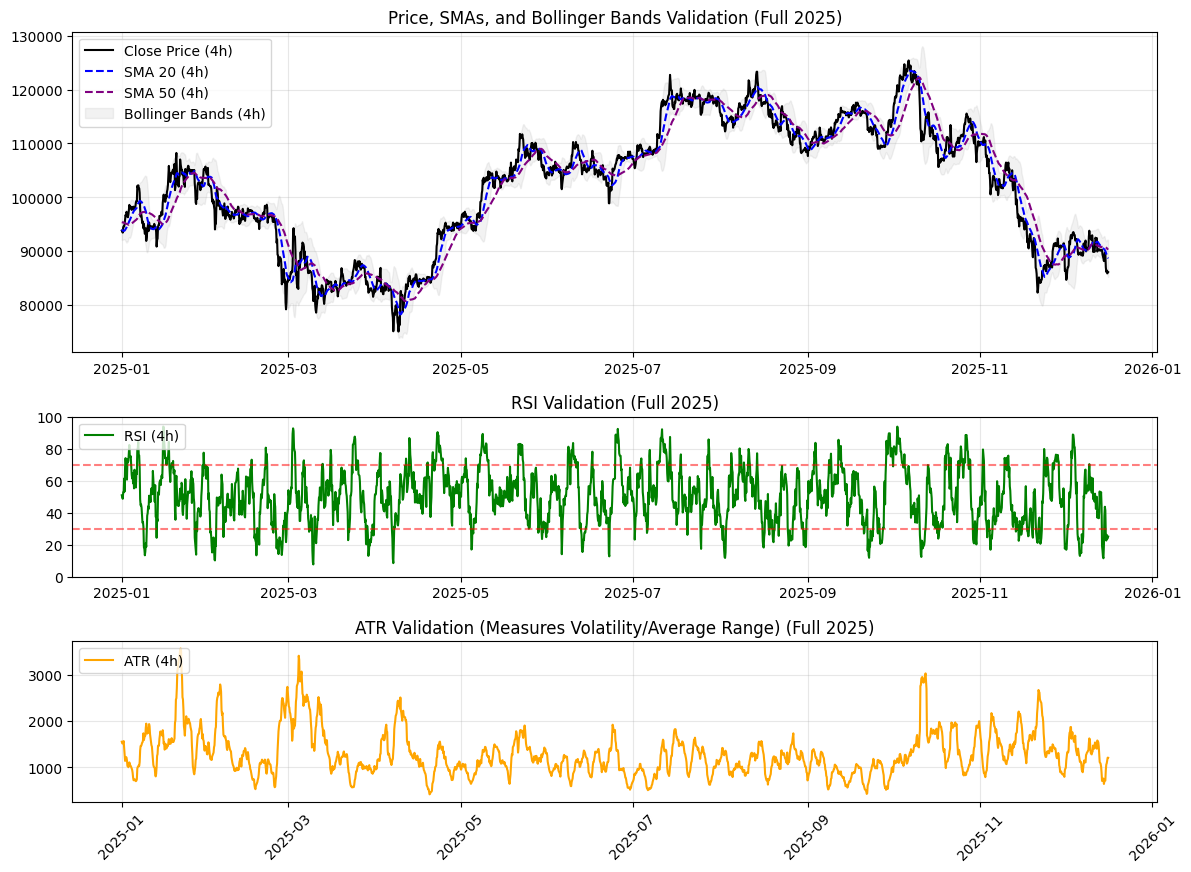

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 1. Load ONLY the finished features file
df = pd.read_csv("../data/btc_usdt_features.csv", index_col=0, parse_dates=True)

# 2. Filter for the entire year 2025 (assuming current year is 2025 based on previous data)
START_DATE = '2025-01-01'
df_plot = df.loc[START_DATE:] # Selects all rows where the index is >= START_DATE

# Verify the range we are plotting
print(f"Plotting data from {df_plot.index.min().date()} to {df_plot.index.max().date()}")
print(f"Total candles in view: {len(df_plot)}")


# --- Visual Validation using Subplots (Code structure is the same as before) ---

fig = plt.figure(figsize=(14, 10))
# Adjust height ratios for the three plots
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1], hspace=0.3) 

# --- Plot 1: Price and SMAs/Bollinger Bands ---
ax_price = fig.add_subplot(gs[0])
ax_price.plot(df_plot.index, df_plot['close'], label='Close Price (4h)', color='black', linewidth=1.5)
ax_price.plot(df_plot.index, df_plot['sma_20_4h'], label='SMA 20 (4h)', color='blue', linestyle='--')
ax_price.plot(df_plot.index, df_plot['sma_50_4h'], label='SMA 50 (4h)', color='purple', linestyle='--')
ax_price.fill_between(df_plot.index, df_plot['bb_upper_4h'], df_plot['bb_lower_4h'], color='gray', alpha=0.1, label='Bollinger Bands (4h)')
ax_price.set_title("Price, SMAs, and Bollinger Bands Validation (Full 2025)")
ax_price.legend(loc='upper left')
ax_price.grid(True, alpha=0.3)

# --- Plot 2: RSI Validation ---
ax_rsi = fig.add_subplot(gs[1], sharex=ax_price)
ax_rsi.plot(df_plot.index, df_plot['rsi_4h'], label='RSI (4h)', color='green')
ax_rsi.axhline(70, linestyle='--', alpha=0.5, color='red') # Overbought line
ax_rsi.axhline(30, linestyle='--', alpha=0.5, color='red') # Oversold line
ax_rsi.set_ylim(0, 100) # RSI must always be between 0 and 100
ax_rsi.set_title("RSI Validation (Full 2025)")
ax_rsi.legend(loc='upper left')
ax_rsi.grid(True, alpha=0.3)


# --- Plot 3: ATR Validation ---
ax_atr = fig.add_subplot(gs[2], sharex=ax_price)
ax_atr.plot(df_plot.index, df_plot['atr_4h'], label='ATR (4h)', color='orange')
ax_atr.set_title("ATR Validation (Measures Volatility/Average Range) (Full 2025)")
ax_atr.legend(loc='upper left')
ax_atr.grid(True, alpha=0.3)

# Format the x-axis dates nicely
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
df = pd.read_csv("../data/btc_usdt_aligned_4h_1d.csv", index_col=0, parse_dates=True)   

df[["close", "D_close"]].dropna().iloc[-10:]

,close,D_close
timestamp,,
2025-12-14 20:00:00+00:00,88172.17,90240.01
2025-12-15 00:00:00+00:00,89282.60,88172.17
2025-12-15 04:00:00+00:00,89753.42,88172.17
2025-12-15 08:00:00+00:00,89641.28,88172.17
2025-12-15 12:00:00+00:00,87033.22,88172.17
2025-12-15 16:00:00+00:00,86149.96,88172.17
2025-12-15 20:00:00+00:00,86432.08,88172.17
2025-12-16 00:00:00+00:00,85875.92,86432.08
2025-12-16 04:00:00+00:00,86021.51,86432.08


In [16]:
df = pd.read_csv("../data/btc_usdt_features.csv", index_col=0, parse_dates=True)   

df.loc["2020-03-01":"2020-04-01", ["close", "sma_20_4h", "sma_50_4h"]]

,close,sma_20_4h,sma_50_4h
timestamp,,,
2020-03-01 00:00:00+00:00,8620.36,8724.5110,9231.0316
2020-03-01 04:00:00+00:00,8541.16,8712.3065,9208.3138
2020-03-01 08:00:00+00:00,8648.37,8707.7410,9187.9632
2020-03-01 12:00:00+00:00,8557.80,8694.9285,9167.3012
2020-03-01 16:00:00+00:00,8542.20,8681.8205,9145.4530
...,...,...,...
2020-04-01 04:00:00+00:00,6331.96,6271.2080,6436.5780
2020-04-01 08:00:00+00:00,6296.87,6275.9040,6432.0650
2020-04-01 12:00:00+00:00,6230.09,6279.7135,6425.3456
